In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import pandas as pd
import netCDF4
%matplotlib inline

In [3]:
!cd /net/h2o/climphys/aruess/scenario_analysis/Lmon_LULCC
!ls

'Analysis of LULCC in CanESM5_Lmon.ipynb'
'Analysis of LULCC in UKESM1-0-LL_Lmon.ipynb'
'Analysis of fLuc in UKESM1-0-LL_Lmon.ipynb'
 areacella_fx_CanESM5_historical_r10i1p1f1_gn.nc
 cropFrac_Lmon_CanESM5_hist_ssp119_r10i1p1f1_gn_185001-210012.nc
 cropFrac_Lmon_CanESM5_hist_ssp585_r10i1p1f1_gn_185001-210012.nc
 cropFrac_Lmon_CanESM5_historical_r10i1p1f1_gn_185001-201412.nc
 cropFrac_Lmon_CanESM5_ssp119_r10i1p1f1_gn_201501-210012.nc
 cropFrac_Lmon_UKESM1-0-LL_hist_ssp119_r1i1p1f2_gn_185001-210012.nc
 cropFrac_Lmon_UKESM1-0-LL_hist_ssp245_r1i1p1f2_gn_185001-210012.nc
 cropFrac_Lmon_UKESM1-0-LL_hist_ssp585_r1i1p1f2_gn_185001-210012-Copy1.nc
 cropFrac_Lmon_UKESM1-0-LL_hist_ssp585_r1i1p1f2_gn_185001-210012.nc
 fLuc_Emon_UKESM1-0-LL_hist_ssp119_r1i1p1f2_gn_185001-210012.nc
 fLuc_Emon_UKESM1-0-LL_hist_ssp245_r1i1p1f2_gn_185001-210012.nc
 fLuc_Emon_UKESM1-0-LL_hist_ssp585_r1i1p1f2_gn_185001-210012.nc
'old_LULCC_ssp5-85 analysis.ipynb'
 raw_climodels
 sftlf_fx_CanESM5_ssp585_r1i1p1f1_gn.nc
 tre

In [4]:
ds_luc_585 = xr.open_dataset('fLuc_Emon_UKESM1-0-LL_hist_ssp119_r1i1p1f2_gn_185001-210012.nc')
ds_luc_245 = xr.open_dataset('fLuc_Emon_UKESM1-0-LL_hist_ssp245_r1i1p1f2_gn_185001-210012.nc')
ds_luc_119 = xr.open_dataset('fLuc_Emon_UKESM1-0-LL_hist_ssp585_r1i1p1f2_gn_185001-210012.nc')

In [5]:
ds_luc_585

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 144, lon: 192, time: 3012)
Coordinates:
  * time       (time) object 1850-01-16 00:00:00 ... 2100-12-16 00:00:00
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    fLuc       (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  144000.0
    creation_date:          2019-06-24T12:24:36Z
    ...                     ...
    variable_id:            fLuc
    variant_label:          r1i1p1f2
    license:                CMIP6 model data produced by the Met Office Hadle...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/33dc4dc8-04d0-492d-9210-96a5f1913351
    NCO:                    netCDF Operators version 5.0.0 (Homepage = http:/...

In [7]:
luc = ds_luc_585.fLuc

In [8]:
luc

<xarray.DataArray 'fLuc' (time: 3012, lat: 144, lon: 192)>
[83275776 values with dtype=float32]
Coordinates:
  * time     (time) object 1850-01-16 00:00:00 ... 2100-12-16 00:00:00
  * lat      (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 ... 353.4 355.3 357.2 359.1
Attributes:
    standard_name:  surface_net_upward_mass_flux_of_carbon_dioxide_expressed_...
    long_name:      Net Carbon Mass Flux into Atmosphere Due to Land-Use Change
    comment:        Carbon mass flux per unit area into atmosphere due to hum...
    units:          kg m-2 s-1
    original_name:  mo: ((stash: m01s19i039, lbproc: 128) + (stash: m01s19i04...
    cell_methods:   area: mean where land time: mean
    cell_measures:  area: areacella
    history:        2019-06-24T12:24:36Z altered by CMOR: replaced missing va...

In [10]:
luc.shape

(3012, 144, 192)

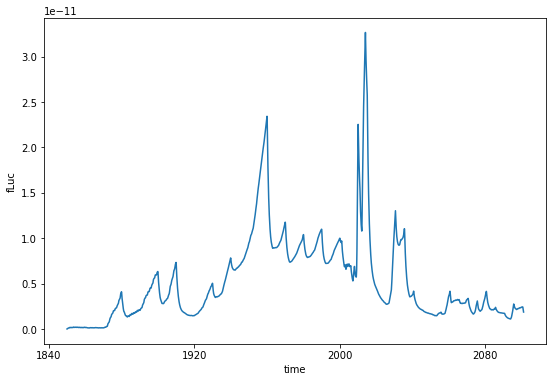

In [11]:
luc.mean(dim=('lat','lon')).plot(size=6)

In [12]:
dset_dict = {'ssp585':ds_luc_585, 'ssp245':ds_luc_245, 'ssp119':ds_luc_119}

In [13]:
time_slice=slice('1850', '2100')

In [14]:
#initialize dictionary of xarray datasets
luc_dict = {}

for name, ds in dset_dict.items():
        
    ds = xr.decode_cf(ds)
    ds = ds.sel(time=time_slice)
    
    # convert from per second to per year
    yearsec = 365*24*60*60
    ds.fLuc.data = ds.fLuc.data * yearsec
    
    #convert from kg to g
    ds.fLuc.data = ds.fLuc.data*(1e3)
    ds.fLuc.attrs['units'] = 'g C m-2 y-1'
    
    # drop redundant variables (like "height: 2m")
    for coord in ds.coords:
        if coord not in ['lat', 'lon', 'time']:
            ds = ds.drop(coord)

    luc_dict[name] = ds

In [15]:
ssp585_hot1 = luc_dict[list(luc_dict.keys())[0]]
ssp585_hot1.attrs['parent_source_id']

'UKESM1-0-LL'

In [17]:
ssp585_hot1.fLuc.attrs['units']

'g C m-2 y-1'

In [47]:
luc_change = (
    ssp585_hot1.fLuc.sel(time=slice('2023', '2033')).mean(dim='time') -
    ssp585_hot1.fLuc.sel(time=slice('1850', '1900')).mean(dim='time')
).compute()
#carbon_flux.attrs.update(ssp_hot1.attrs)
luc_change = luc_change.rename (
r'Δ C (gC m$^{\minus2}$)'
)

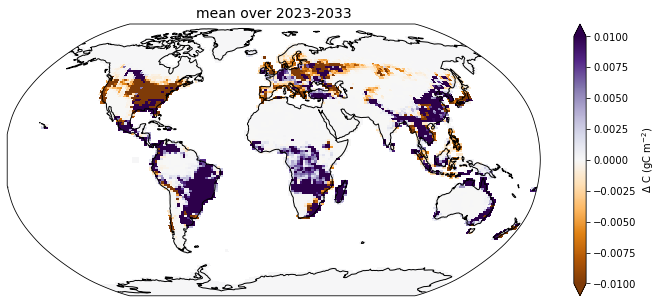

In [49]:
#map centered on Europe and Africa
robin = ccrs.Robinson(central_longitude=0) # define target coordinate frame
geo = ccrs.PlateCarree(central_longitude=0) # define origin coordinate frame

#prepare the figure
plt.figure(figsize=(12,5))
ax = plt.subplot(1, 1, 1, projection=robin)

#set min/max values for the colorbar
norm = mpl.colors.Normalize(vmin=-0.01, vmax=0.01)

#plot
q = luc_change.plot(ax=ax, cmap='PuOr', norm=norm, transform = geo) # plot a colormap in transformed coordinates
ax.coastlines()

#Add title with the model name (parent_source_id is the model name, from the dataset attributes)
title = 'mean over 2023-2033'
plt.title(title, fontsize=14);

#save figure
plt.savefig("UKESM1-0-LL Luc Anomaly at 1.5C Global Map_ssp585.png")

In [50]:
ssp245_hot1 = luc_dict[list(luc_dict.keys())[1]]
ssp245_hot1.attrs['parent_source_id']

'UKESM1-0-LL'

In [51]:
ssp245_hot1.fLuc.attrs['units']

'g C m-2 y-1'

In [52]:
luc_change_ssp245 = (
    ssp245_hot1.fLuc.sel(time=slice('2023', '2033')).mean(dim='time') -
    ssp245_hot1.fLuc.sel(time=slice('1850', '1900')).mean(dim='time')
).compute()
#carbon_flux.attrs.update(ssp_hot1.attrs)
luc_change_ssp245 = luc_change_ssp245.rename (
r'Δ C (gC m$^{\minus2}$)'
)

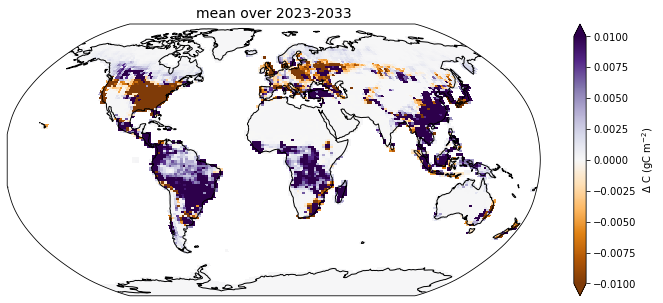

In [53]:
#map centered on Europe and Africa
robin = ccrs.Robinson(central_longitude=0) # define target coordinate frame
geo = ccrs.PlateCarree(central_longitude=0) # define origin coordinate frame

#prepare the figure
plt.figure(figsize=(12,5))
ax = plt.subplot(1, 1, 1, projection=robin)

#set min/max values for the colorbar
norm = mpl.colors.Normalize(vmin=-0.01, vmax=0.01)

#plot
q = luc_change_ssp245.plot(ax=ax, cmap='PuOr', norm=norm, transform = geo) # plot a colormap in transformed coordinates
ax.coastlines()

#Add title with the model name (parent_source_id is the model name, from the dataset attributes)
title = 'mean over 2023-2033'
plt.title(title, fontsize=14);

#save figure
plt.savefig("UKESM1-0-LL Luc Anomaly at 1.5C Global Map_ssp245.png")

In [54]:
ssp119_hot1 = luc_dict[list(luc_dict.keys())[2]]
ssp119_hot1.attrs['parent_source_id']

'UKESM1-0-LL'

In [55]:
ssp119_hot1.fLuc.attrs['units']

'g C m-2 y-1'

In [56]:
luc_change = (
    ssp119_hot1.fLuc.sel(time=slice('2022', '2032')).mean(dim='time') -
    ssp119_hot1.fLuc.sel(time=slice('1850', '1900')).mean(dim='time')
).compute()
#carbon_flux.attrs.update(ssp_hot1.attrs)
luc_change = luc_change.rename (
r'Δ C (gC m$^{\minus2}$)'
)

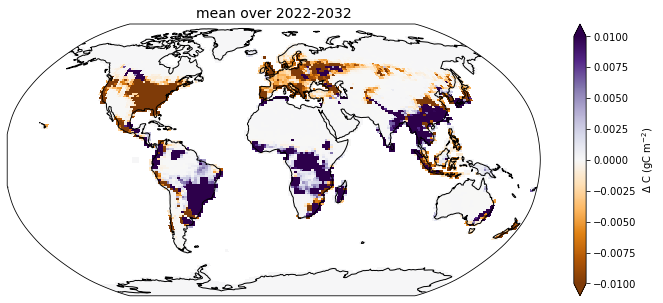

In [57]:
#map centered on Europe and Africa
robin = ccrs.Robinson(central_longitude=0) # define target coordinate frame
geo = ccrs.PlateCarree(central_longitude=0) # define origin coordinate frame

#prepare the figure
plt.figure(figsize=(12,5))
ax = plt.subplot(1, 1, 1, projection=robin)

#set min/max values for the colorbar
norm = mpl.colors.Normalize(vmin=-0.01, vmax=0.01)

#plot
q = luc_change.plot(ax=ax, cmap='PuOr', norm=norm, transform = geo) # plot a colormap in transformed coordinates
ax.coastlines()

#Add title with the model name (parent_source_id is the model name, from the dataset attributes)
title = 'mean over 2022-2032'
plt.title(title, fontsize=14);

#save figure
plt.savefig("UKESM1-0-LL Luc Anomaly at 1.5C Global Map_ssp119.png")